In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

"""
    데이터셋 출처
    https://www.kaggle.com/qiriro/swell-heart-rate-variability-hrv
"""

# 기존 train.csv + test.csv = HRV.csv
df = pd.read_csv('../HRV.csv')

df.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,15.522602,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2,interruption
3,881.757864,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2,no stress


In [2]:
# index를 제거하기 위한 작업
# 기존 DataFrame에는 인덱싱이 되어있기 때문에 그 부분을 제거하기 위한 작업
blankIndex=[''] * len(df)
# index값에 대입하여 인덱싱된 값을 제거
df.index=blankIndex
df.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,15.522602,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2,no stress
,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2,interruption
,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2,interruption
,881.757864,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2,no stress
,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2,no stress


In [3]:
# 데이터 확인
print("\n* Data Shape : ", df.shape)
print("\n* Class : ", set(df['condition'].values))
Y_NAME = "class"

#    target이 되는 클래스 : 'interruption', 'time pressure', 'no stress'
#    전처리 후 : 0, 1, 2
# 각 컬럼별 NULL값 찾기
print("\n* NULL값 확인\n")
print(df[df.isnull().any(1)])


* Data Shape :  (410322, 36)

* Class :  {'time pressure', 'no stress', 'interruption'}

* NULL값 확인

Empty DataFrame
Columns: [MEAN_RR, MEDIAN_RR, SDRR, RMSSD, SDSD, SDRR_RMSSD, HR, pNN25, pNN50, SD1, SD2, KURT, SKEW, MEAN_REL_RR, MEDIAN_REL_RR, SDRR_REL_RR, RMSSD_REL_RR, SDSD_REL_RR, SDRR_RMSSD_REL_RR, KURT_REL_RR, SKEW_REL_RR, VLF, VLF_PCT, LF, LF_PCT, LF_NU, HF, HF_PCT, HF_NU, TP, LF_HF, HF_LF, sampen, higuci, datasetId, condition]
Index: []

[0 rows x 36 columns]


In [4]:
df.rename(index=str, columns={"condition": Y_NAME}, inplace=True)
# target class의 공백 제거
df[Y_NAME].replace("no stress", "no_stress", inplace=True)
df[Y_NAME].replace("time pressure", "time_pressure", inplace=True)

labels = set(df[Y_NAME].values)
print("\n* Class : ",labels)
df.head()


* Class :  {'no_stress', 'time_pressure', 'interruption'}


,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,class
,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,15.522602,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2,no_stress
,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2,interruption
,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2,interruption
,881.757864,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2,no_stress
,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2,no_stress


In [5]:
# 데이터 전처리 및 비율 확인
labels_count = dict(no_stress=0, interruption=0, time_pressure=0)
total = 0

print(*np.unique(df[Y_NAME],return_counts=True))
for label in df[Y_NAME].values:
    labels_count[label] += 1
for count in labels_count.values():
    total += count
for label in labels_count.items():
    print("{0: <15} 개수:{1}개\t데이터비중:{2:.3f}".format(*label, label[1]/total))
del labels_count

['interruption' 'no_stress' 'time_pressure'] [116932 222240  71150]
no_stress       개수:222240개	데이터비중:0.542
interruption    개수:116932개	데이터비중:0.285
time_pressure   개수:71150개	데이터비중:0.173


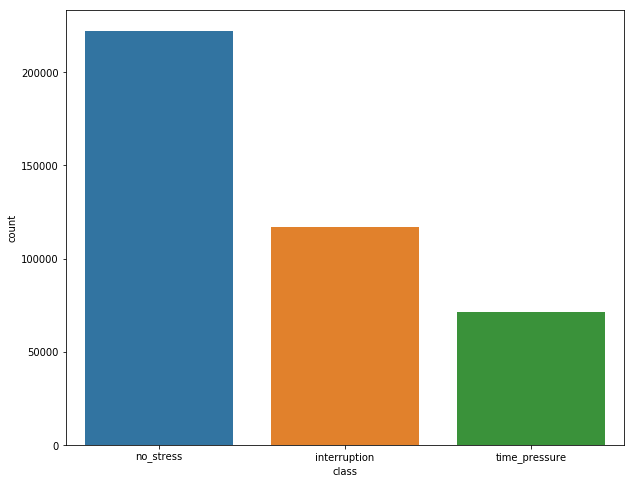

In [6]:
a4_dims = (10, 8)
plt.subplots(figsize=a4_dims)
sns.set_context("paper", font_scale=2)
# Data balance확인
sns.countplot(x=df[Y_NAME], data=df)

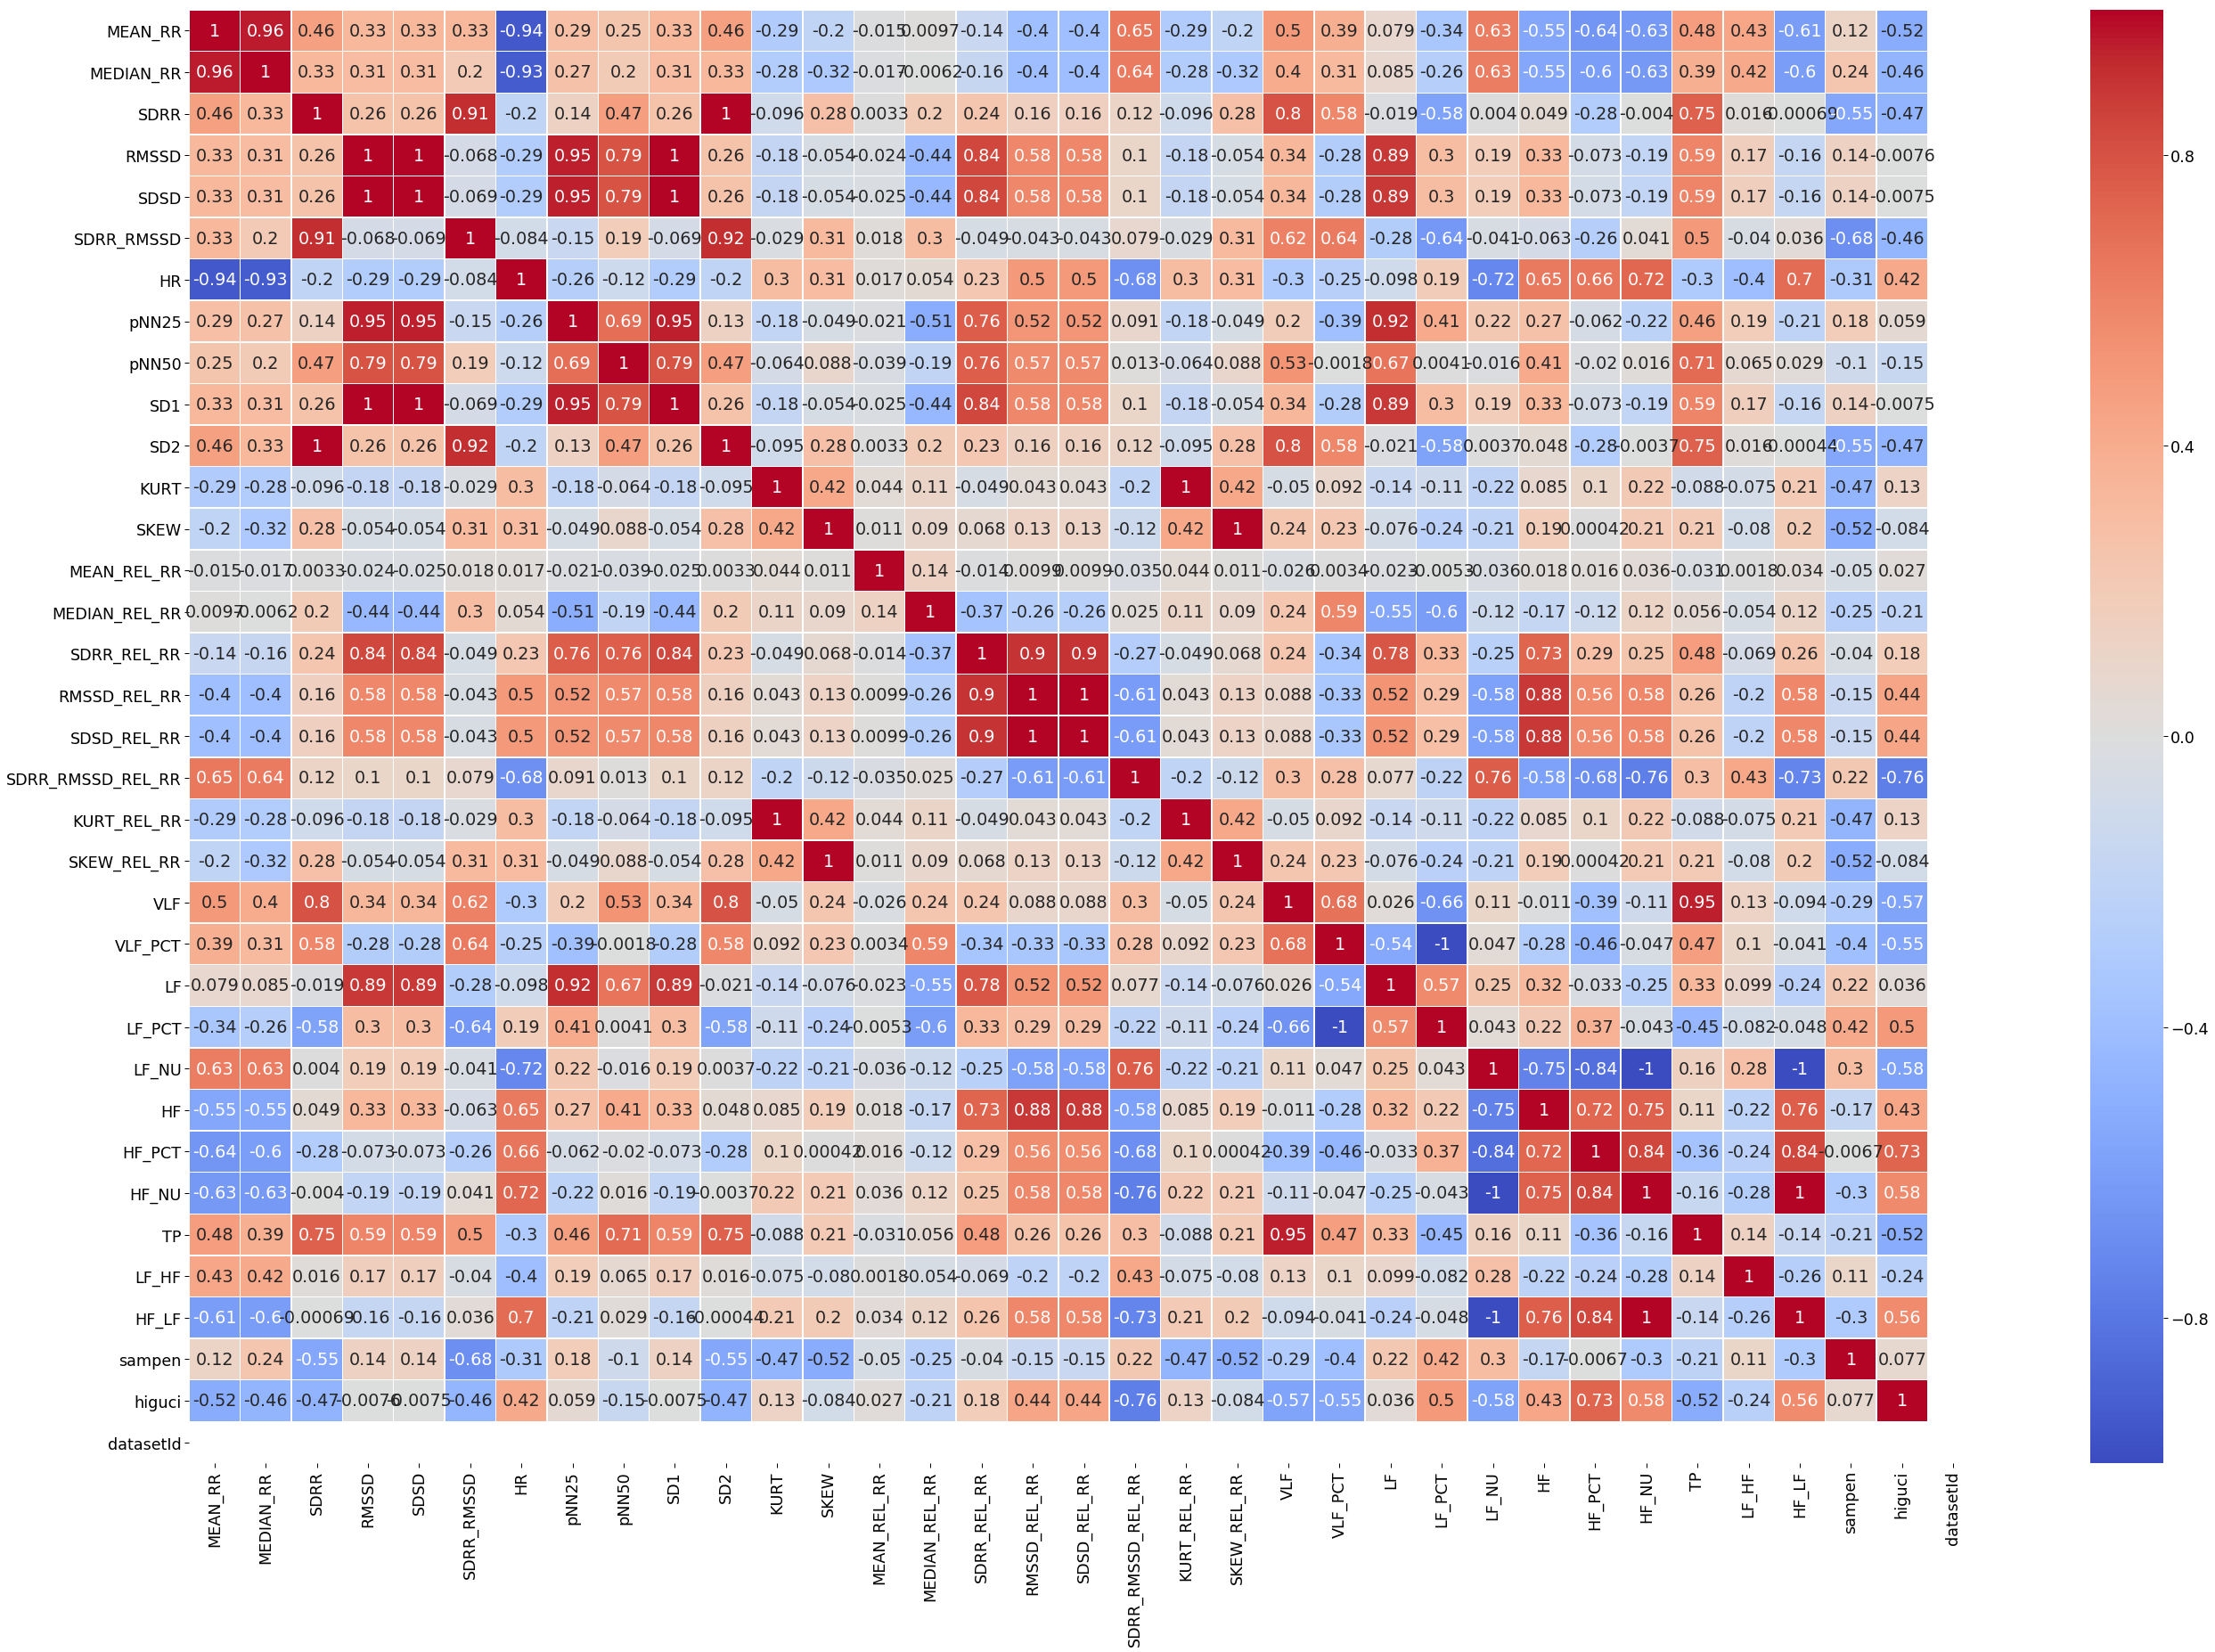

In [7]:
plt.figure(figsize=(45, 30))
sns.heatmap(df.corr(),annot=True,linewidth = 0.5, cmap='coolwarm')

## Weka Feature Selection

### === Attribute Selection on all input data ===

Search Method:
	Attribute ranking.

Attribute Evaluator (supervised, Class (nominal): 36 condition):
	OneR feature evaluator.

	Using 10 fold cross validation for evaluating attributes.
	Minimum bucket size for OneR: 6

Ranked attributes:
* 96.8983   15 MEDIAN_REL_RR
* 84.6667    2 MEDIAN_RR
* 60.5537    7 HR
* 60.3453    1 MEAN_RR
* 59.4375    8 pNN25
* 57.4446    3 SDRR
* 57.3311   11 SD2
* 57.121     9 pNN50
* 56.6536   17 RMSSD_REL_RR
* 56.6133   18 SDSD_REL_RR
* 55.2447   16 SDRR_REL_RR
* 55.1679    4 RMSSD
* 55.1123    5 SDSD
* 55.1116   10 SD1
* 54.1623   35 datasetId
* 54.0449   28 HF_PCT
* 53.2014   30 TP
* 53.1904   19 SDRR_RMSSD_REL_RR
* 52.9367   24 LF
* 52.8621    6 SDRR_RMSSD
* 52.6326   27 HF
* 52.5163   32 HF_LF
* 52.5112   29 HF_NU
* 52.4985   26 LF_NU
* 52.4971   31 LF_HF
* 52.3857   33 sampen
* 51.5829   34 higuci
* 51.453    22 VLF
* 51.3994   25 LF_PCT
* 51.1969   23 VLF_PCT
* 51.1359   12 KURT
* 51.1359   20 KURT_REL_RR
* 50.5286   21 SKEW_REL_RR
* 50.5286   13 SKEW
* 48.5875   14 MEAN_REL_RR

Selected attributes: 15,2,7,1,8,3,11,9,17,18,16,4,5,10,35,28,30,19,24,6,27,32,29,26,31,33,34,22,25,23,12,20,21,13,14 : 35

### === Stratified cross-validation ===

=== Summary ===
* Correctly Classified Instances      397595               96.8983 %
* Incorrectly Classified Instances     12727                3.1017 %
* Kappa statistic                          0.9477
* Mean absolute error                      0.0207
* Root mean squared error                  0.1438
* Relative absolute error                  5.2098 %
* Root relative squared error             32.2793 %
* Total Number of Instances           410322     


    === Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.983    0.033    0.972      0.983    0.978      0.951    0.975     0.965     no stress
                 0.962    0.013    0.967      0.962    0.964      0.950    0.974     0.941     interruption
                 0.937    0.008    0.962      0.937    0.949      0.939    0.965     0.912     time pressure
    Weighted Avg.0.969    0.023    0.969      0.969    0.969      0.949    0.973     0.949     

    === Confusion Matrix ===
          a      b      c   <-- classified as
     218432   2330   1478 |      a = no stress
       3266 112474   1192 |      b = interruption
       2947   1514  66689 |      c = time pressure

***

# ================= Contents of the test ====================

### ● Target Features : no_stress, interruption, time_pressure
### ● Feature : 35 -> 10
> 상위 랭크 특성 10개만 사용

> datasetId는 제거

### ● training : test = 75% : 25%

### ● Point : 인물의 상태에 따라 업무를 어떤식으로 주었는지의 상태를 알 수 있는지 확인

# ================== Test Using Algorithm ==================

### ● KNeighborsClassifier
### ● GaussianNB
### ● DecisionTreeClassifier
### ● RandomForestClassifier
### ● GradientBoostingClassifier

# ======================= Scaling =======================

### ● StandardScaler
### ● MinMaxScaler
### ● MaxAbsScaler
### ● RobustScaler

In [8]:
# 위의 Feature Selection에서 상위 10가지 Feature만 사용
x = df[['MEDIAN_REL_RR','MEDIAN_RR','HR','MEAN_RR','pNN25','SDRR','SD2','pNN50','RMSSD_REL_RR','SDSD_REL_RR']]
# 스케일링을 완료한 값을 저장할 변수
ScalerDataSet = list()
x.head()

,MEDIAN_REL_RR,MEDIAN_RR,HR,MEAN_RR,pNN25,SDRR,SD2,pNN50,RMSSD_REL_RR,SDSD_REL_RR
,-0.000179,853.763730,69.499952,885.157845,11.133333,140.972741,199.061782,0.533333,0.007969,0.007969
,0.000611,948.357865,64.363150,939.425371,5.600000,81.317742,114.634458,0.000000,0.004769,0.004769
,-0.000263,907.006860,67.450066,898.186047,13.066667,84.497236,118.939253,0.200000,0.008716,0.008716
,0.000494,893.460030,68.809562,881.757864,11.800000,90.370537,127.318597,0.133333,0.008660,0.008660
,-0.002736,811.184865,74.565728,809.625331,20.200000,62.766242,87.718281,0.200000,0.013055,0.013055


In [9]:
from sklearn.preprocessing import StandardScaler

# 평균을 제거하고 데이터를 단위 분산으로 조정한다.
# 그러나 이상치가 있다면 평균과 표준편차에 영향을 미쳐 변환된 데이터의 확산은 매우 달라지게 된다.

# StandardScaler 적용
standardScaler = StandardScaler()
# 각 Scaling기법은 데이터 셋의 형태에 맞춰서 피팅을 시켜 수행 됨
standardScaler.fit(x)
# 데이터 값 변환
train_data_standardScaled = standardScaler.transform(x)
# 변환된 데이터 셋을 Pandas로 전환
scaled_data = pd.DataFrame(train_data_standardScaled)

# index 제거
blankIndex=[''] * len(scaled_data)
scaled_data.index=blankIndex

ScalerDataSet.append(scaled_data)

scaled_data.head()

,0,1,2,3,4,5,6,7,8,9
,0.330042,0.089073,-0.429347,0.308921,0.156965,0.410946,0.412046,-0.335731,-0.444477,-0.444474
,1.240877,0.804145,-0.926340,0.744506,-0.517644,-0.363135,-0.361824,-0.874536,-1.265843,-1.265850
,0.233680,0.491557,-0.627676,0.413494,0.392672,-0.321878,-0.322366,-0.672484,-0.252742,-0.252738
,1.105713,0.389152,-0.496143,0.281631,0.238243,-0.245666,-0.245560,-0.739834,-0.267118,-0.267114
,-2.617901,-0.232796,0.060775,-0.297349,1.262348,-0.603858,-0.608541,-0.672484,0.861197,0.861201


In [10]:
from sklearn.preprocessing import MinMaxScaler

# 모든 feature 값이 0~1사이에 있도록 데이터를 재조정한다.
# 다만 이상치가 있는 경우 변환된 값이 매우 좁은 범위로 압축될 수 있다.

# MinMaxScaler 적용
minMaxScaler = MinMaxScaler()
minMaxScaler.fit(x)
train_data_minMaxScaled = minMaxScaler.transform(x)
scaled_data = pd.DataFrame(train_data_minMaxScaled)

# index 제거
blankIndex=[''] * len(scaled_data)
scaled_data.index=blankIndex

ScalerDataSet.append(scaled_data)

scaled_data.head()

,0,1,2,3,4,5,6,7,8,9
,0.651172,0.296233,0.319345,0.435971,0.282572,0.212099,0.211924,0.097561,0.200081,0.200081
,0.772318,0.379515,0.240339,0.506036,0.142132,0.100855,0.100622,0.000000,0.065273,0.065271
,0.638355,0.343109,0.287817,0.452792,0.331641,0.106784,0.106298,0.036585,0.231550,0.231550
,0.754341,0.331183,0.308727,0.431581,0.299492,0.117737,0.117344,0.024390,0.229190,0.229190
,0.259078,0.258746,0.397260,0.338451,0.512690,0.066260,0.065139,0.036585,0.414376,0.414377


In [11]:
from sklearn.preprocessing import MaxAbsScaler

# 절대값이 0~1사이에 매핑되도록 한다. 즉 -1~1 사이로 재조정한다.
# 양수 데이터로만 구성된 특징 데이터셋에서는 MinMaxScaler와 유사하게 동작하며, 큰 이상치에 민감할 수 있다.

# MaxAbsScaler 적용
maxAbsScaler = MaxAbsScaler()
maxAbsScaler.fit(x)
train_data_maxAbsScaled = maxAbsScaler.transform(x)
scaled_data = pd.DataFrame(train_data_maxAbsScaled)

# index 제거
blankIndex=[''] * len(scaled_data)
scaled_data.index=blankIndex

ScalerDataSet.append(scaled_data)

scaled_data.head()

,0,1,2,3,4,5,6,7,8,9
,-0.040499,0.516455,0.610966,0.669551,0.282572,0.250179,0.249810,0.097561,0.295630,0.295630
,0.138011,0.573677,0.565809,0.710600,0.142132,0.144312,0.143859,0.000000,0.176925,0.176924
,-0.059384,0.548663,0.592945,0.679406,0.331641,0.149954,0.149261,0.036585,0.323340,0.323340
,0.111521,0.540468,0.604897,0.666979,0.299492,0.160377,0.159777,0.024390,0.321263,0.321263
,-0.618248,0.490699,0.655498,0.612417,0.512690,0.111389,0.110081,0.036585,0.484329,0.484329


In [12]:
from sklearn.preprocessing import RobustScaler

# 아웃라이어의 영향을 최소화한 기법이다.
# 중앙값(median)과 IQR(interquartile range)을 사용하기 때문에
# StandardScaler와 비교해보면 표준화 후 동일한 값을 더 넓게 분포 시키고 있음을 확인 할 수 있다.

# RobustScaler 적용
robustScaler = RobustScaler()
robustScaler.fit(x)
train_data_robustScaled = robustScaler.transform(x)
scaled_data = pd.DataFrame(train_data_robustScaled)

# index 제거
blankIndex=[''] * len(scaled_data)
scaled_data.index=blankIndex

ScalerDataSet.append(scaled_data)

scaled_data.head()

,0,1,2,3,4,5,6,7,8,9
,0.126566,0.211421,-0.346320,0.379577,0.365517,1.080591,1.084289,0.047619,-0.161416,-0.161413
,0.879936,0.798015,-0.723394,0.710523,-0.206897,-0.024197,-0.021000,-0.333333,-0.876240,-0.876246
,0.046863,0.541591,-0.496795,0.459028,0.565517,0.034686,0.035357,-0.190476,0.005448,0.005453
,0.768140,0.457585,-0.396999,0.358842,0.434483,0.143458,0.145056,-0.238095,-0.007063,-0.007059
,-2.311739,-0.052618,0.025539,-0.081052,1.303448,-0.367764,-0.373376,-0.190476,0.974895,0.974900


# === Algorithm Search ===

In [13]:
# train 데이터와 test데이터를 랜덤으로 만들기 위한 라이브러리 선언
from sklearn.model_selection import train_test_split
y = df['class'].values

ScalerTechnique = ['StandardScaler', 'MinMaxScaler', 'MaxAbsScaler', 'RobustScaler']

# 각 알고리즘별 정확도를 담을 리스트
Classifiers = list()

========  0   StandardScaler  ========
- 이웃 수 : 50 -
테스트 세트 예측 : ['interruption' 'interruption' 'no_stress' ... 'no_stress' 'no_stress'
 'interruption']
테스트 세트 정확도 :  0.9992298768777844 

- 이웃 수 : 75 -
테스트 세트 예측 : ['interruption' 'interruption' 'no_stress' ... 'no_stress' 'no_stress'
 'interruption']
테스트 세트 정확도 :  0.9980600696035328 

- 이웃 수 : 100 -
테스트 세트 예측 : ['interruption' 'interruption' 'no_stress' ... 'no_stress' 'no_stress'
 'interruption']
테스트 세트 정확도 :  0.9970169914506585 

- 이웃 수 : 125 -
테스트 세트 예측 : ['interruption' 'interruption' 'no_stress' ... 'no_stress' 'no_stress'
 'interruption']
테스트 세트 정확도 :  0.9956132227215566 

- 이웃 수 : 150 -
테스트 세트 예측 : ['interruption' 'interruption' 'no_stress' ... 'no_stress' 'no_stress'
 'interruption']
테스트 세트 정확도 :  0.9938000214464667 

- 이웃 수 : 175 -
테스트 세트 예측 : ['interruption' 'interruption' 'no_stress' ... 'no_stress' 'no_stress'
 'interruption']
테스트 세트 정확도 :  0.9922695235959875 

- 이웃 수 : 200 -
테스트 세트 예측 : ['interruption' 'interruption' 'no_s

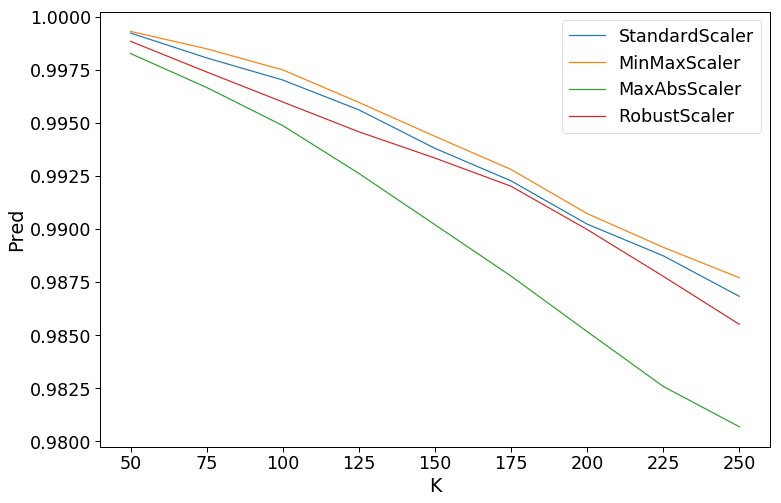

적합 스케일링 기법 :  MinMaxScaler
적합 K값 :  50


In [14]:
from sklearn.neighbors import KNeighborsClassifier

# 각 스케일링 데이터를 적용 한 예측 값
y_pred = 0
# 스케일링 번호
sc = 0
# K값의 수
knn = [50,75,100,125,150,175,200,225,250]
# 가장 큰 정확도가 나온 이웃의 수
knn_n = 0
# 스케일링 별 예측 정확도 리스트
scalerPredList = list()
for num in range(len(ScalerDataSet)):
    print("======== ",num, " ", ScalerTechnique[num], " ========")
    x_train, x_test, y_train, y_test = train_test_split(ScalerDataSet[num], y, test_size=0.25, random_state=0)
    
    # 현재 스케일링의 예측 값을 저장할 리스트
    predList = list()
    
    for n in knn:
        # knn : 이웃 수
        print("- 이웃 수 : {} -".format(n))
        KNN = KNeighborsClassifier(n_neighbors = n)
        # Model생성
        KNN.fit(x_train, y_train)

        # 예측 정확도
        new_score = KNN.score(x_test, y_test)
        # 예측 한 결과 저장
        predList.append(new_score)

        # 결과 출력
        print("테스트 세트 예측 : {}".format(KNN.predict(x_test)))
        print("테스트 세트 정확도 : ",new_score,"\n")

        if(new_score > y_pred):
            y_pred = new_score
            sc = num
            knn_n = n
        
    # 현재 스케일링 예측 정확도를 리스트로 추가
    scalerPredList.append(predList)

plt.figure(figsize=(12, 8))
for pl in scalerPredList:
    plt.plot(knn, pl)
plt.xlabel("K")
plt.ylabel("Pred")
plt.legend(ScalerTechnique)
plt.show()
print("적합 스케일링 기법 : ", ScalerTechnique[sc])
print("적합 K값 : ",knn_n)

In [15]:
# 위에서 찾아낸 스케일링 기법으로 데이터셋 설정
x_train, x_test, y_train, y_test = train_test_split(ScalerDataSet[sc], y, test_size=0.25, random_state=0)
# 위에서 찾아낸 하이퍼파라미터를 적용 후 리피팅
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(x_train, y_train)

# 예측 완료된 결과 데이터 리스트
y_pred_KN = KNN.predict(x_test)
# 예측이 완련된 결과물을 저장
Classifiers.append(y_pred_KN)

========  0   StandardScaler  ========
테스트 세트 예측 : ['no_stress' 'no_stress' 'no_stress' ... 'no_stress' 'no_stress'
 'time_pressure']
테스트 세트 정확도 :  0.5715190922295552 

========  1   MinMaxScaler  ========
테스트 세트 예측 : ['no_stress' 'no_stress' 'no_stress' ... 'no_stress' 'no_stress'
 'time_pressure']
테스트 세트 정확도 :  0.5715190922295552 

========  2   MaxAbsScaler  ========
테스트 세트 예측 : ['no_stress' 'no_stress' 'no_stress' ... 'no_stress' 'no_stress'
 'time_pressure']
테스트 세트 정확도 :  0.5715190922295552 

========  3   RobustScaler  ========
테스트 세트 예측 : ['no_stress' 'no_stress' 'no_stress' ... 'no_stress' 'no_stress'
 'time_pressure']
테스트 세트 정확도 :  0.5715190922295552 



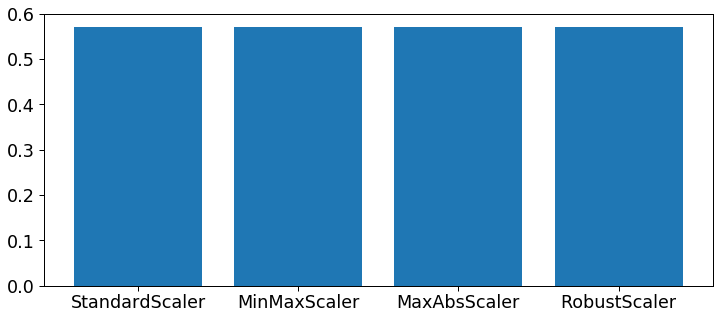

적합 스케일링 기법 :  StandardScaler


In [16]:
# 가우시안 나이브 베이즈 알고리즘
from sklearn.naive_bayes import GaussianNB

# 각 스케일링 데이터를 적용 한 예측 값
y_pred = 0
# 스케일링 번호
gb_sc = 0
# 스케일링 별 예측 정확도 리스트
scalerPredList = list()

for num in range(len(ScalerDataSet)):
    print("======== ",num, " ", ScalerTechnique[num], " ========")
    # 스케일 기법 별로 지도학습 실시
    x_train, x_test, y_train, y_test = train_test_split(ScalerDataSet[num], y, test_size=0.25, random_state=0)
    
    GNB = GaussianNB()
    GNB.fit(x_train, y_train)

    new_score = GNB.score(x_test, y_test)
    scalerPredList.append(new_score)
    
    # 결과 출력
    print("테스트 세트 예측 : {}".format(GNB.predict(x_test)))
    print("테스트 세트 정확도 : ",new_score,"\n")
    
    if(new_score > y_pred):
        y_pred = new_score
        gb_sc = num
plt.figure(figsize=(12,5))
plt.bar(ScalerTechnique, scalerPredList)
plt.show()
print("적합 스케일링 기법 : ", ScalerTechnique[gb_sc])

In [17]:
# 위에서 찾아낸 스케일링 기법으로 데이터셋 설정
x_train, x_test, y_train, y_test = train_test_split(ScalerDataSet[gb_sc], y, test_size=0.25, random_state=0)
    
GNB = GaussianNB()
GNB.fit(x_train, y_train)

# 예측 완료된 결과 데이터 리스트
y_pred_GB = GNB.predict(x_test)
# 예측이 완련된 결과물을 저장
Classifiers.append(y_pred_GB)

========  0   StandardScaler  ========
트리 깊이 :  10
테스트 세트 예측 : ['interruption' 'interruption' 'no_stress' ... 'no_stress' 'no_stress'
 'interruption']
테스트 세트 정확도 :  0.887035610883107 

트리 깊이 :  11
테스트 세트 예측 : ['interruption' 'interruption' 'no_stress' ... 'no_stress' 'no_stress'
 'interruption']
테스트 세트 정확도 :  0.9213889511702947 

트리 깊이 :  12
테스트 세트 예측 : ['interruption' 'interruption' 'no_stress' ... 'no_stress' 'no_stress'
 'interruption']
테스트 세트 정확도 :  0.946003645899338 

트리 깊이 :  13
테스트 세트 예측 : ['interruption' 'interruption' 'no_stress' ... 'no_stress' 'no_stress'
 'interruption']
테스트 세트 정확도 :  0.9670406800479621 

트리 깊이 :  14
테스트 세트 예측 : ['interruption' 'interruption' 'no_stress' ... 'no_stress' 'no_stress'
 'interruption']
테스트 세트 정확도 :  0.9780271200319748 

트리 깊이 :  15
테스트 세트 예측 : ['interruption' 'interruption' 'no_stress' ... 'no_stress' 'no_stress'
 'interruption']
테스트 세트 정확도 :  0.9869956424679034 

트리 깊이 :  16
테스트 세트 예측 : ['interruption' 'interruption' 'no_stress' ... 'no_stress

트리 깊이 :  17
테스트 세트 예측 : ['interruption' 'interruption' 'no_stress' ... 'no_stress' 'no_stress'
 'interruption']
테스트 세트 정확도 :  0.9923670075355085 

트리 깊이 :  18
테스트 세트 예측 : ['interruption' 'interruption' 'no_stress' ... 'no_stress' 'no_stress'
 'interruption']
테스트 세트 정확도 :  0.9966075589046705 

트리 깊이 :  19
테스트 세트 예측 : ['interruption' 'interruption' 'no_stress' ... 'no_stress' 'no_stress'
 'interruption']
테스트 세트 정확도 :  0.9984695021495209 

트리 깊이 :  20
테스트 세트 예측 : ['interruption' 'interruption' 'no_stress' ... 'no_stress' 'no_stress'
 'interruption']
테스트 세트 정확도 :  0.9987522055741317 

트리 깊이 :  21
테스트 세트 예측 : ['interruption' 'interruption' 'no_stress' ... 'no_stress' 'no_stress'
 'interruption']
테스트 세트 정확도 :  0.9993078640294012 

트리 깊이 :  22
테스트 세트 예측 : ['interruption' 'interruption' 'no_stress' ... 'no_stress' 'no_stress'
 'interruption']
테스트 세트 정확도 :  0.9993468576052096 

트리 깊이 :  23
테스트 세트 예측 : ['interruption' 'interruption' 'no_stress' ... 'no_stress' 'no_stress'
 'interruption']
테스트 세트

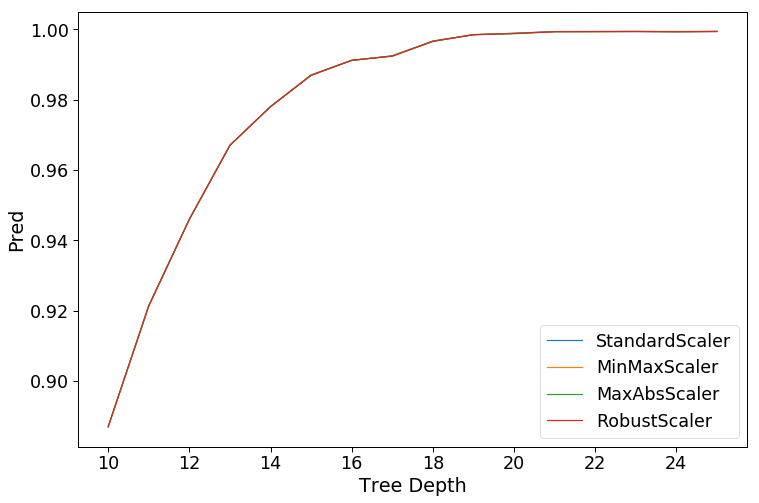

적합 스케일링 기법 :  MinMaxScaler
적합 Max Depth :  25


In [18]:
from sklearn.tree import DecisionTreeClassifier

# 각 트리의 최대 예측 정확도를 담을 변수
y_pred = 0
# 가장 적합한 트리의 깊이를 저장 하고 있을 변수
decision_tree = 0
# 스케일링 번호
tree_sc = 0
# 스케일링 별 예측 정확도 리스트
scalerPredList = list()

for num in range(len(ScalerDataSet)):
    print("======== ",num, " ", ScalerTechnique[num], " ========")
    # 스케일 기법 별로 지도학습 실시
    x_train, x_test, y_train, y_test = train_test_split(ScalerDataSet[num], y, test_size=0.25, random_state=0)
    
    # 현재 스케일링의 예측 값을 저장할 리스트
    predList = list()
    
    for i in range(10, 26):
        DTR = DecisionTreeClassifier(max_depth = i)
        DTR.fit(x_train,y_train)

        new_score = DTR.score(x_test, y_test)
        predList.append(new_score)
        
        # 결과 출력
        print("트리 깊이 : ", i)
        print("테스트 세트 예측 : {}".format(DTR.predict(x_test)))
        print("테스트 세트 정확도 : ",new_score,"\n")

        if(new_score > y_pred):
            y_pred = new_score
            decision_tree = i
            tree_sc = num

    # 현재 스케일링 예측 정확도를 리스트로 추가
    scalerPredList.append(predList)

plt.figure(figsize=(12, 8))
for pl in scalerPredList:
    plt.plot(range(10, 26), pl)
plt.xlabel("Tree Depth")
plt.ylabel("Pred")
plt.legend(ScalerTechnique)
plt.show()

print("적합 스케일링 기법 : ", ScalerTechnique[tree_sc])
print("적합 Max Depth : ", decision_tree)

In [19]:
# 위에서 찾아낸 스케일링 기법으로 데이터셋 설정
x_train, x_test, y_train, y_test = train_test_split(ScalerDataSet[tree_sc], y, test_size=0.25, random_state=0)
    
DTR = DecisionTreeClassifier(max_depth = decision_tree)
DTR.fit(x_train, y_train)

# 예측 완료된 결과 데이터 리스트
y_pred_DTR = DTR.predict(x_test)
# 예측이 완련된 결과물을 저장
Classifiers.append(y_pred_DTR)

========  0   StandardScaler  ========
트리 깊이 :  10
테스트 세트 예측 : ['interruption' 'interruption' 'no_stress' ... 'no_stress' 'no_stress'
 'no_stress']
테스트 세트 정확도 : 0.952963999181135

트리 깊이 :  11
테스트 세트 예측 : ['interruption' 'interruption' 'no_stress' ... 'no_stress' 'no_stress'
 'interruption']
테스트 세트 정확도 : 0.966835963774968

트리 깊이 :  12
테스트 세트 예측 : ['interruption' 'interruption' 'no_stress' ... 'no_stress' 'no_stress'
 'interruption']
테스트 세트 정확도 : 0.9845877891617356

트리 깊이 :  13
테스트 세트 예측 : ['interruption' 'interruption' 'no_stress' ... 'no_stress' 'no_stress'
 'interruption']
테스트 세트 정확도 : 0.9957789454187422

트리 깊이 :  14
테스트 세트 예측 : ['interruption' 'interruption' 'no_stress' ... 'no_stress' 'no_stress'
 'interruption']
테스트 세트 정확도 : 0.9948528479932931

트리 깊이 :  15
테스트 세트 예측 : ['interruption' 'interruption' 'no_stress' ... 'no_stress' 'no_stress'
 'interruption']
테스트 세트 정확도 : 0.9987034636043712

트리 깊이 :  16
테스트 세트 예측 : ['interruption' 'interruption' 'no_stress' ... 'no_stress' 'no_stress'
 

테스트 세트 정확도 : 0.9999220128483832

트리 깊이 :  19
테스트 세트 예측 : ['interruption' 'interruption' 'no_stress' ... 'no_stress' 'no_stress'
 'interruption']
테스트 세트 정확도 : 0.9998927676665269

트리 깊이 :  20
테스트 세트 예측 : ['interruption' 'interruption' 'no_stress' ... 'no_stress' 'no_stress'
 'interruption']
테스트 세트 정확도 : 0.9999805032120959

트리 깊이 :  21
테스트 세트 예측 : ['interruption' 'interruption' 'no_stress' ... 'no_stress' 'no_stress'
 'interruption']
테스트 세트 정확도 : 0.9999610064241916

트리 깊이 :  22
테스트 세트 예측 : ['interruption' 'interruption' 'no_stress' ... 'no_stress' 'no_stress'
 'interruption']
테스트 세트 정확도 : 0.9999805032120959

트리 깊이 :  23
테스트 세트 예측 : ['interruption' 'interruption' 'no_stress' ... 'no_stress' 'no_stress'
 'interruption']
테스트 세트 정확도 : 1.0

트리 깊이 :  24
테스트 세트 예측 : ['interruption' 'interruption' 'no_stress' ... 'no_stress' 'no_stress'
 'interruption']
테스트 세트 정확도 : 0.9999512580302395

트리 깊이 :  25
테스트 세트 예측 : ['interruption' 'interruption' 'no_stress' ... 'no_stress' 'no_stress'
 'interruption']


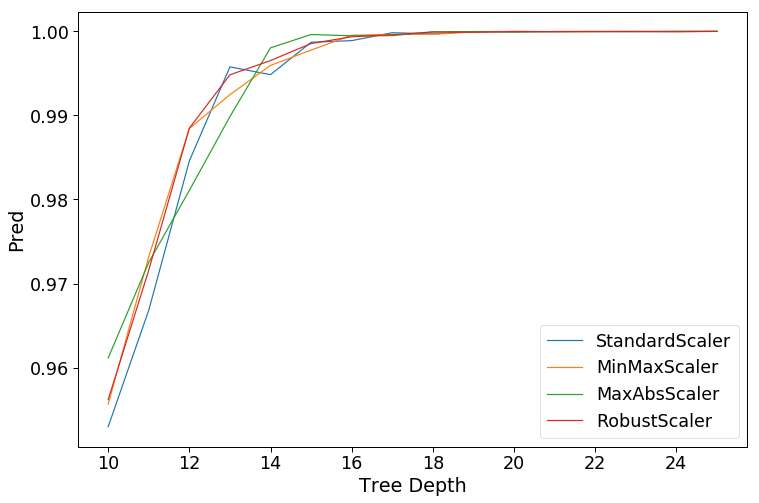

적합 스케일링 기법 :  StandardScaler
적합 트리 깊이 :  24


In [21]:
# 랜덤 포레스트 분류 알고리즘
from sklearn.ensemble import RandomForestClassifier

# n_estimators가 Default인 상태에서 최대 예측 정확도를 담을 변수
y_pred = 0
# n_estimators가 Default인 상태에서 가장 적합한 트리 깊이를 담을 변수
random_tree = 0
# 스케일링 번호
rf_sc = 0
# 스케일링 별 예측 정확도 리스트
scalerPredList = list()

for num in range(len(ScalerDataSet)):
    print("======== ",num, " ", ScalerTechnique[num], " ========")
    # 스케일 기법 별로 지도학습 실시
    x_train, x_test, y_train, y_test = train_test_split(ScalerDataSet[num], y, test_size=0.25, random_state=0)

    # 현재 스케일링의 예측 값을 저장할 리스트
    predList = list()
    
    # 적합한 깊이 찾기
    for depth in range(10,26):
        RFC = RandomForestClassifier(max_depth = depth)
        RFC.fit(x_train, y_train)
        
        # 결과 출력
        print("트리 깊이 : ",depth)
        print("테스트 세트 예측 : {}".format(RFC.predict(x_test)))
        
        new_score = RFC.score(x_test, y_test)
        predList.append(new_score)
        print("테스트 세트 정확도 : {}\n".format(new_score))
        if(new_score > y_pred):
            random_tree = depth
            y_pred = new_score
            rf_sc = num

    # 현재 스케일링 예측 정확도를 리스트로 추가
    scalerPredList.append(predList)
       
        
plt.figure(figsize=(12, 8))
for pl in scalerPredList:
    plt.plot(range(10, 26), pl)
plt.xlabel("Tree Depth")
plt.ylabel("Pred")
plt.legend(ScalerTechnique)
plt.show()
        
print("적합 스케일링 기법 : ", ScalerTechnique[rf_sc])
print("적합 트리 깊이 : ",random_tree)

In [22]:
# 위에서 찾아낸 스케일링 기법으로 데이터셋 설정
x_train, x_test, y_train, y_test = train_test_split(ScalerDataSet[rf_sc], y, test_size=0.25, random_state=0)
    
RFC = RandomForestClassifier(max_depth = random_tree)
RFC.fit(x_train, y_train)

# 예측 완료된 결과 데이터 리스트
y_pred_RFC = RFC.predict(x_test)
# 예측이 완련된 결과물을 저장
Classifiers.append(y_pred_RFC)

========  0   StandardScaler  ========
학습 복잡도 : 1
테스트 세트 예측 : ['interruption' 'interruption' 'no_stress' ... 'no_stress' 'no_stress'
 'interruption']
테스트 세트 정확도 : 0.9965295717530537

학습 복잡도 : 0.5
테스트 세트 예측 : ['interruption' 'interruption' 'no_stress' ... 'no_stress' 'no_stress'
 'interruption']
테스트 세트 정확도 : 0.9834082334935319

학습 복잡도 : 0.25
테스트 세트 예측 : ['interruption' 'interruption' 'no_stress' ... 'no_stress' 'no_stress'
 'interruption']
테스트 세트 정확도 : 0.9435080570476014

학습 복잡도 : 0.1
테스트 세트 예측 : ['interruption' 'interruption' 'no_stress' ... 'no_stress' 'no_stress'
 'no_stress']
테스트 세트 정확도 : 0.862557393669393

학습 복잡도 : 0.05
테스트 세트 예측 : ['interruption' 'interruption' 'no_stress' ... 'no_stress' 'no_stress'
 'no_stress']
테스트 세트 정확도 : 0.7999239625271737

학습 복잡도 : 0.01
테스트 세트 예측 : ['interruption' 'no_stress' 'no_stress' ... 'no_stress' 'no_stress'
 'no_stress']
테스트 세트 정확도 : 0.6833136740721966

========  1   MinMaxScaler  ========
학습 복잡도 : 1
테스트 세트 예측 : ['interruption' 'interruption' 'no_st

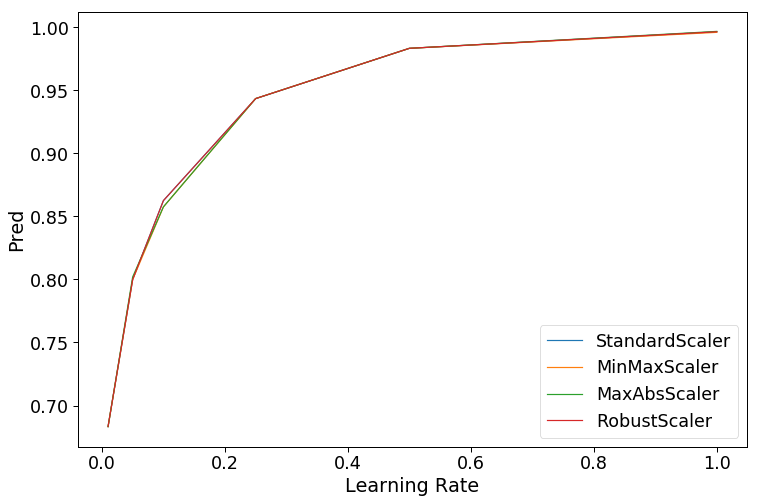

적합 학습 복잡도 : 1
적합 스케일링 기법 :  MaxAbsScaler


In [23]:
# GradientBoostingClassifier 사용
from sklearn.ensemble import GradientBoostingClassifier

# 각 스케일링 데이터를 적용 한 예측 값
y_pred = 0
# 스케일링 번호
gbc_sc = 0
# 학습 복잡도 리스트
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
# 최종 학습 복잡도
learning = 0
# 스케일링 별 예측 정확도 리스트
scalerPredList = list()

for num in range(len(ScalerDataSet)):
    print("======== ",num, " ", ScalerTechnique[num], " ========")
    # 스케일 기법 별로 지도학습 실시
    x_train, x_test, y_train, y_test = train_test_split(ScalerDataSet[num], y, test_size=0.25, random_state=0)
    
    # 현재 스케일링의 예측 값을 저장할 리스트
    predList = list()
    
    for rate in learning_rates:

        GBC = GradientBoostingClassifier(learning_rate = rate)
        GBC.fit(x_train, y_train)

        new_score = GBC.score(x_test, y_test)
        predList.append(new_score)
        
        print("학습 복잡도 : {}".format(rate))
        print("테스트 세트 예측 : {}".format(GBC.predict(x_test)))
        print("테스트 세트 정확도 : {}\n".format(new_score))

        if(new_score > y_pred):
            y_pred = new_score
            gbc_sc = num
            learning = rate

    # 현재 스케일링 예측 정확도를 리스트로 추가
    scalerPredList.append(predList)
            
plt.figure(figsize=(12, 8))
for pl in scalerPredList:
    plt.plot(learning_rates, pl)
plt.xlabel("Learning Rate")
plt.ylabel("Pred")
plt.legend(ScalerTechnique)
plt.show()

print("적합 학습 복잡도 : {}".format(learning))
print("적합 스케일링 기법 : ", ScalerTechnique[gbc_sc])

In [24]:
# 위에서 찾아낸 스케일링 기법으로 데이터셋 설정
x_train, x_test, y_train, y_test = train_test_split(ScalerDataSet[gbc_sc], y, test_size=0.25, random_state=0)
    
GBC = GradientBoostingClassifier(learning_rate = learning)
GBC.fit(x_train, y_train)

# 예측 완료된 결과 데이터 리스트
y_pred_GBC = GBC.predict(x_test)
# 예측이 완련된 결과물을 저장
Classifiers.append(y_pred_GBC)

In [25]:
Class = ['KNeighbors', 'Naive Bayes' ,'DecisionTree', 'RandomForest' , 'GradientBoosting']
score=list()
a=0
index=0
from sklearn.metrics import accuracy_score
for pred in range(5):
    if a < accuracy_score(y_test,Classifiers[pred]):
        a = accuracy_score(y_test,Classifiers[pred])
        index=pred
        
    print("{} 분류기 정확도 : {}%".format(Class[pred],accuracy_score(y_test,Classifiers[pred])*100))
    
print("\n{} 분류기가 가장정확함\n정확도 : {}%".format(Class[index],a*100))

KNeighbors 분류기 정확도 : 98.77072752264064%
Naive Bayes 분류기 정확도 : 57.151909222955524%
DecisionTree 분류기 정확도 : 99.93566059991616%
RandomForest 분류기 정확도 : 99.99805032120959%
GradientBoosting 분류기 정확도 : 99.68415203595208%

RandomForest 분류기가 가장정확함
정확도 : 99.99805032120959%


In [26]:
from sklearn.metrics import f1_score

for i in range(len(Classifiers)):
    print(Class[i])
    print("macro : {}".format(f1_score(y_test, Classifiers[i], average='macro')))
    print("micro : {}".format(f1_score(y_test, Classifiers[i], average='micro')))
    print("weighted : {}".format(f1_score(y_test, Classifiers[i], average='weighted')))
    print("None : {}\n".format(f1_score(y_test, Classifiers[i], average=None)))

KNeighbors
macro : 0.9862782447703031
micro : 0.9877072752264064
weighted : 0.9876992544993196
None : [0.98610778 0.99016699 0.98255996]

Naive Bayes
macro : 0.5025455064499341
micro : 0.5715190922295552
weighted : 0.556171703982048
None : [0.35986096 0.69055972 0.45721584]

DecisionTree
macro : 0.9992512584811144
micro : 0.9993566059991617
weighted : 0.9993566341886909
None : [0.99934934 0.9995061  0.99889834]

RandomForest
macro : 0.9999751763418973
micro : 0.9999805032120959
weighted : 0.9999805028362435
None : [1.         0.99998204 0.99994349]

GradientBoosting
macro : 0.9965426734705408
micro : 0.9968415203595208
weighted : 0.9968412943119216
None : [0.99602903 0.99750458 0.99609441]

